# Creating Visualizations for Relevant View Data
Primarily StarCraft 2 visualizations which are the focus of this channel
- Views per Game, Player, Player Country, Race/Matchup

In [1]:
# Importing Libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import matplotlib.ticker as ticker

In [2]:
# Importing Data
game_df = pickle.load(open(r"Data\game_df.pickle","rb"))
countries_df = pickle.load(open(r"Data\countries_df.pickle","rb"))
sc2races_df = pickle.load(open(r"Data\sc2races_df.pickle","rb"))
matchup_df = pickle.load(open(r"Data\matchup_df.pickle","rb"))
main_df = pickle.load(open(r"Data\players_cleaned_df.pickle","rb"))
player_df = pickle.load(open(r"Data\player_df.pickle","rb"))
grammed_df = pickle.load(open(r"Data\grammed_df.pickle","rb"))

# Views Over Time

In [3]:
dates = main_df['date'].apply(lambda x: x[:10])
dates_df = pd.to_datetime(dates, infer_datetime_format=True)
dates_df = pd.DataFrame(dates_df)

In [5]:
dates_df['views'] = main_df['views']
dates_df_index = dates_df.set_index('date')

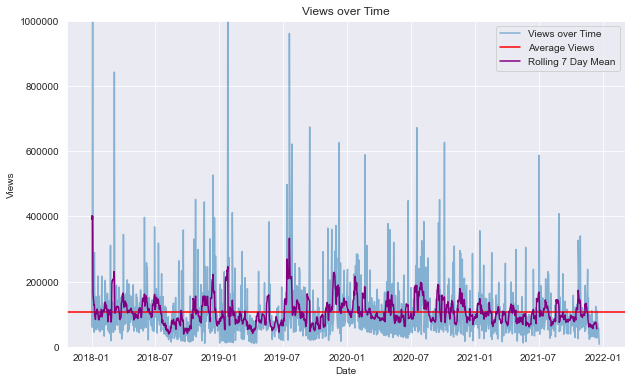

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(dates_df_index, label="Views over Time",alpha=.5)
plt.axhline(dates_df_index.views.mean(), c='red', label="Average Views")
plt.plot(dates_df_index.rolling(window=7).mean(),c='purple',label="Rolling 7 Day Mean")
plt.xlabel("Date")
plt.ylabel("Views")
plt.ylim(0,1000000)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.title("Views over Time")
plt.legend()
plt.show()

## Removing Outliers

In [32]:
time_outliers_df = dates_df_index.copy()
time_outliers_df = time_outliers_df[(np.abs(stats.zscore(time_outliers_df))<3).all(axis=1)].reset_index()

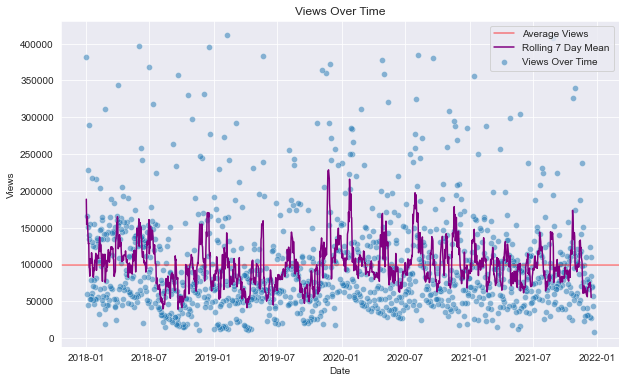

In [45]:
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(y=time_outliers_df['views'],x=time_outliers_df['date'],ax=ax,alpha=.5,label="Views Over Time")
ax.set_title('Views Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Views')
ax.axhline(time_outliers_df['views'].mean(), color="red", label="Average Views", alpha=.5)
plt.plot(time_outliers_df['date'],time_outliers_df['views'].rolling(window=7).mean(), c='purple', label="Rolling 7 Day Mean")
plt.legend()
plt.show()

## Views Over Time Findings
- Average viewer count remains relatively steady from 2018-2021
- There are higher spikes representing exceptionally popular videos prior to 2020

# Views By Video Length

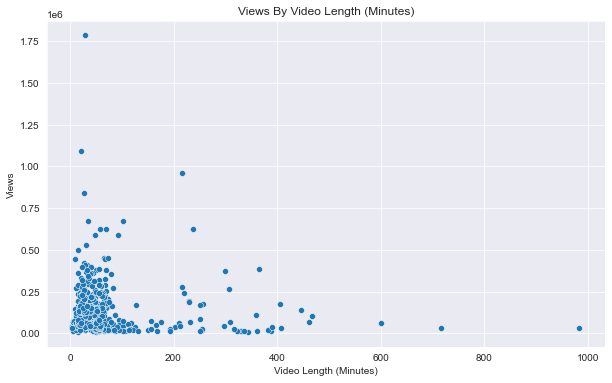

In [51]:
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(y=main_df['views'],x=main_df['minutes'],ax=ax)
ax.set_title('Views By Video Length (Minutes)')
ax.set_xlabel('Video Length (Minutes)')
ax.set_ylabel('Views')
plt.show()

## Removing Outliers for Better View

In [54]:
outliers_df = main_df[['views','minutes']].copy()
outliers_df = outliers_df[(np.abs(stats.zscore(outliers_df))<3).all(axis=1)]

In [60]:
outliers_df.head()

,views,minutes
0,8088,51.00
1,57301,45.63
2,43247,21.68
3,71067,31.07
4,69353,35.10


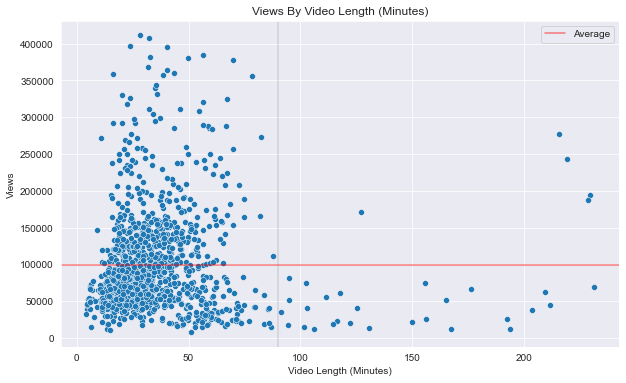

In [73]:
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(y=outliers_df['views'],x=outliers_df['minutes'],ax=ax)
ax.set_title('Views By Video Length (Minutes)')
ax.set_xlabel('Video Length (Minutes)')
ax.set_ylabel('Views')
ax.axhline(outliers_df['views'].mean(), color="red", label="Average", alpha=.5)
ax.axvline(90, color="grey", alpha=.25)
plt.legend()
plt.show()

## Video Length Findings
- Videos over 90 minutes usually have lower than average views
- Most views appear to be less than 150,000

# Game In Title Visualizations

In [3]:
# Looking at games with more than just 1 video
games = game_df.loc[game_df['num_videos']>1]
games.sort_values(by='avg_views', ascending=False,inplace=True)

In [4]:
total_videos = games['num_videos'].sum()
games['% of videos'] = games['num_videos'].apply(lambda x: x/total_videos)

In [5]:
games

,game_title,avg_views,num_videos,% of videos
14,starcraft,247225.090909,11,0.008871
15,starcraft2,122538.140082,978,0.788710
17,theyarebillions,86441.000000,4,0.003226
0,ageofempires4,68345.363636,11,0.008871
20,warcraft3,61438.469388,49,0.039516
11,none,48994.268908,119,0.095968
7,frostpunk,31125.125000,40,0.032258
21,worldofwarcraft,29155.000000,3,0.002419
19,underlords,20990.750000,4,0.003226
8,hearthstone,20215.500000,2,0.001613


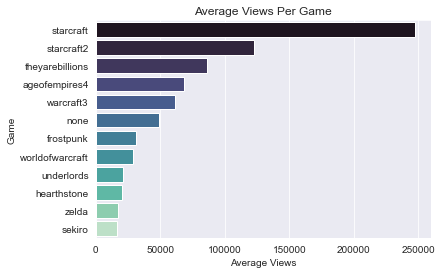

In [6]:
ax = sns.barplot(y=games['game_title'],x=games['avg_views'],palette='mako')
ax.set_title('Average Views Per Game')
ax.set_xlabel('Average Views')
ax.set_ylabel('Game')
plt.show()

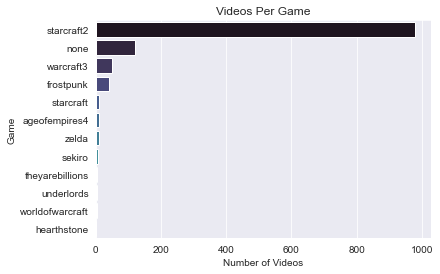

In [7]:
games.sort_values(by='num_videos', ascending=False,inplace=True)
ax = sns.barplot(y=games['game_title'],x=games['num_videos'],palette='mako')
ax.set_title('Videos Per Game')
ax.set_xlabel('Number of Videos')
ax.set_ylabel('Game')
plt.show()

In [8]:
only_games = main_df.loc[main_df['game'].isin(games['game_title'])]

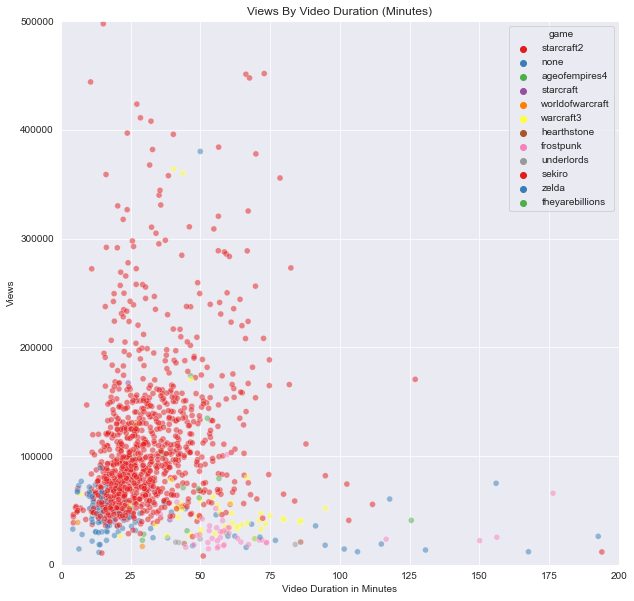

In [9]:
fig,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=only_games['minutes'],y=only_games['views'],hue=only_games['game'], ax=ax, palette="Set1",alpha=.5)
ax.set_xlim(0,200)
ax.set_ylim(0,500000)
ax.set_title('Views By Video Duration (Minutes)')
ax.set_xlabel('Video Duration in Minutes')
ax.set_ylabel('Views')
plt.show()

## Game Findings
- Games with the highest average views are Real Time Strategy games
- StarCraft 2 is in ~80% of the titles but generates half of the average views of StarCraft 1
- Many of the games have less than 12 videos uploaded to the channel
- At a glance, it appears that average views do not increase significantly with video length.
    Average views appears to also decrease with longer durations for some games


## Visualizations per Game
- Only taking a look at a few popular games

### StarCraft 2

In [10]:
x = only_games['minutes'].loc[only_games['game']=='starcraft2']
y = only_games['views'].loc[only_games['game']=='starcraft2']

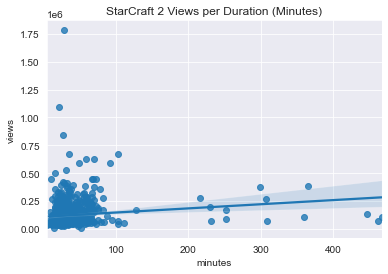

In [11]:
sns.regplot(x=x,y=y)
plt.title('StarCraft 2 Views per Duration (Minutes)')
plt.show()

### Age of Empires 4

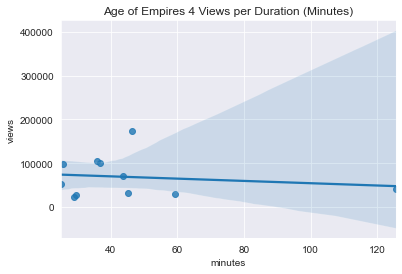

In [12]:
title = 'ageofempires4'
x = only_games['minutes'].loc[only_games['game']==title]
y = only_games['views'].loc[only_games['game']==title]
sns.regplot(x=x,y=y)
plt.title('Age of Empires 4 Views per Duration (Minutes)')
plt.show()

### StarCraft 1

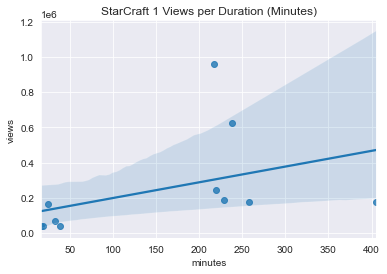

In [13]:
title = 'starcraft'
x = only_games['minutes'].loc[only_games['game']==title]
y = only_games['views'].loc[only_games['game']==title]
sns.regplot(x=x,y=y)
plt.title('StarCraft 1 Views per Duration (Minutes)')
plt.show()

### Warcraft 3

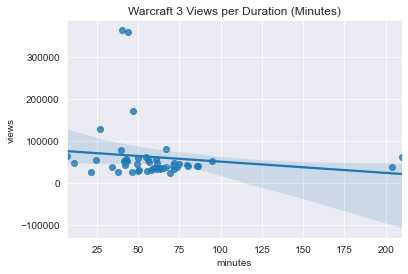

In [14]:
title = 'warcraft3'
x = only_games['minutes'].loc[only_games['game']==title]
y = only_games['views'].loc[only_games['game']==title]
sns.regplot(x=x,y=y)
plt.title('Warcraft 3 Views per Duration (Minutes)')
plt.show()

### Frostpunk

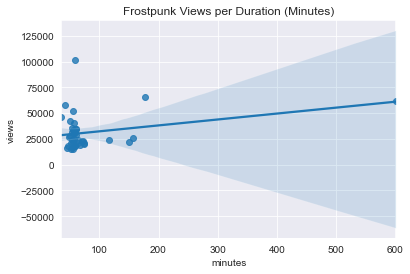

In [15]:
title = 'frostpunk'
x = only_games['minutes'].loc[only_games['game']==title]
y = only_games['views'].loc[only_games['game']==title]
sns.regplot(x=x,y=y)
plt.title('Frostpunk Views per Duration (Minutes)')
plt.show()

### Zelda

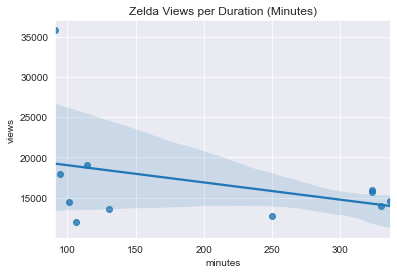

In [16]:
title = 'zelda'
x = only_games['minutes'].loc[only_games['game']==title]
y = only_games['views'].loc[only_games['game']==title]
sns.regplot(x=x,y=y)
plt.title('Zelda Views per Duration (Minutes)')
plt.show()

### They Are Billions

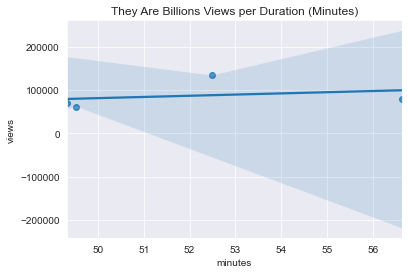

In [17]:
title = 'theyarebillions'
x = only_games['minutes'].loc[only_games['game']==title]
y = only_games['views'].loc[only_games['game']==title]
sns.regplot(x=x,y=y)
plt.title('They Are Billions Views per Duration (Minutes)')
plt.show()

## Final Findings Per Game
- Overall, average views gradually decrease as video length increases
- The highest average views can be found in shorter length videos, typically less than 50 minutes

# SC2 Player In Title Visualizations

In [18]:
# Pulling players found in at least 5 videos
players = player_df.loc[player_df['num_videos']>4]
players.sort_values(by='avg_views', ascending=False,inplace=True)

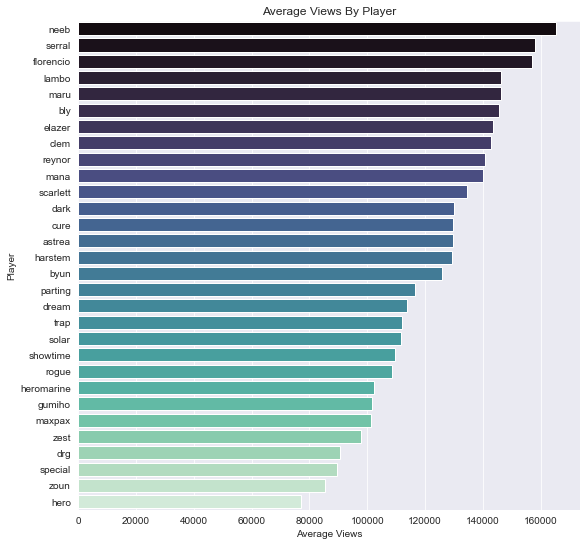

In [19]:
fig,ax = plt.subplots(figsize=(9,9))
sns.barplot(y=players['tag'],x=players['avg_views'],palette='mako',ax=ax)
ax.set_title('Average Views By Player')
ax.set_xlabel('Average Views')
ax.set_ylabel('Player')
plt.show()

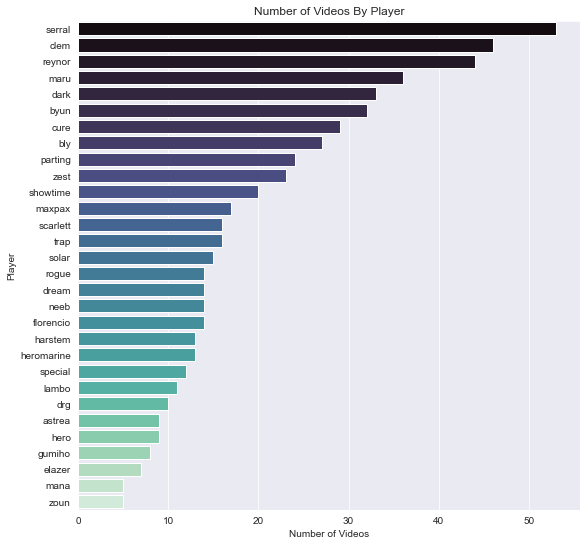

In [20]:
players.sort_values(by='num_videos', ascending=False,inplace=True)
fig,ax = plt.subplots(figsize=(9,9))
sns.barplot(y=players['tag'],x=players['num_videos'],palette='mako',ax=ax)
ax.set_title('Number of Videos By Player')
ax.set_xlabel('Number of Videos')
ax.set_ylabel('Player')
plt.show()

## Player Findings
- Serral, Clem and Reynor are featured in the most videos and pull in a large amount of views on average
- There are a few players such as Neeb, Florencio, Lambo, and Scarlett who also have a large amount of views but not
    featured in as many videos

# SC2 Views By Player Country

In [21]:
# Pulling countries found in at least 5 videos
countries = countries_df.loc[countries_df['num_videos']>4]
countries.sort_values(by='avg_views',ascending=False,inplace=True)

In [22]:
countries

,country_code,avg_views,num_videos,country
31,fi,153975.545455,55,Finland
33,us,146180.536585,41,United States
16,ua,145191.178571,28,Ukraine
34,fr,141228.333333,51,France
6,it,140566.318182,44,Italy
3,ca,128139.900000,20,Canada
58,nl,125122.312500,16,Netherlands
48,kr,118680.906667,225,"Korea, Republic of"
45,pl,111562.642857,14,Poland
57,de,110417.807692,52,Germany


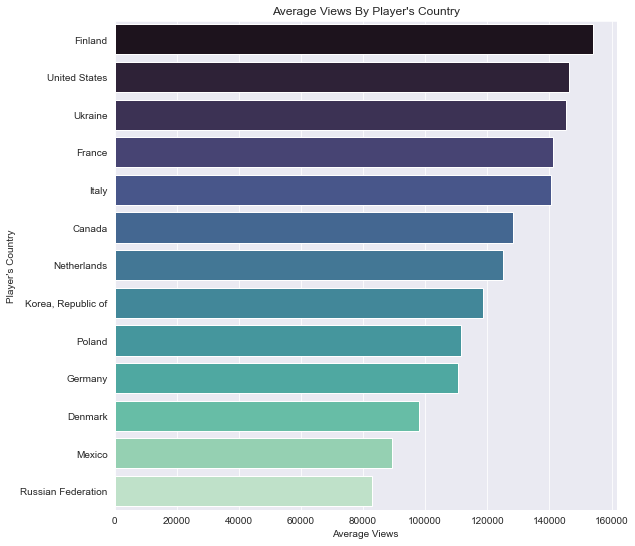

In [23]:
fig,ax = plt.subplots(figsize=(9,9))
sns.barplot(y=countries['country'],x=countries['avg_views'],palette='mako',ax=ax)
ax.set_title('Average Views By Player\'s Country')
ax.set_xlabel('Average Views')
ax.set_ylabel('Player\'s Country')
plt.show()

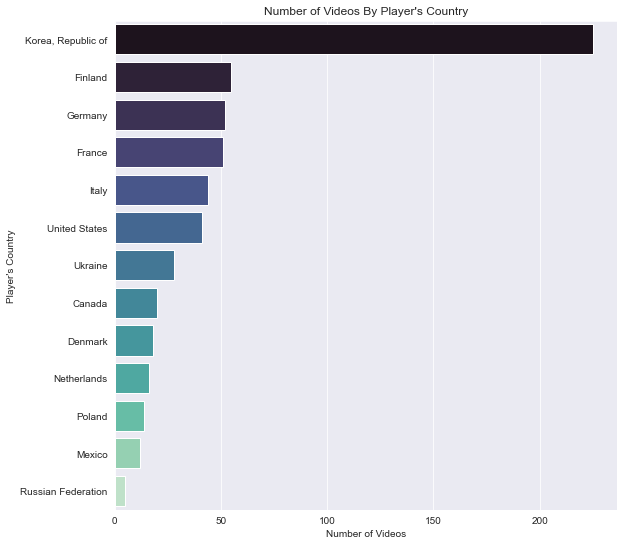

In [24]:
fig,ax = plt.subplots(figsize=(9,9))
countries.sort_values(by='num_videos',ascending=False,inplace=True)
sns.barplot(y=countries['country'],x=countries['num_videos'],palette='mako',ax=ax)
ax.set_title('Number of Videos By Player\'s Country')
ax.set_xlabel('Number of Videos')
ax.set_ylabel('Player\'s Country')
plt.show()

In [25]:
player_df[['tag','avg_views']].loc[(player_df['country']=='kr') & (player_df['num_videos']>4)].sort_values(by='avg_views',
                                                                                                           ascending=False)

,tag,avg_views
1,maru,146143.527778
4,dark,129995.939394
5,cure,129780.103448
13,byun,125849.343750
15,parting,116425.500000
22,dream,113785.285714
8,trap,112093.375000
7,solar,111772.400000
9,rogue,108407.857143
40,gumiho,101550.125000


## Country Findings
- Players from popular countries include:
    * Finland = Serral
    * USA = Neeb, Astrea, Florencio
    * Ukraine = Bly
    * France = Clem, Marinelord
    * Italy = Reynor
    * Canada = Scarlett
    * Netherlands = uThermal, Harstem
- There are a large number of players from Korea featured, but the average views are negatively impacted by less popular
    players such as Zoun and Hero

# SC2 Races

In [26]:
sc2races = sc2races_df.loc[sc2races_df['num_videos']>4]
sc2races.sort_values(by='avg_views',ascending=False,inplace=True)

In [27]:
sc2races

,race,avg_views,num_videos
0,z,133687.225941,239
2,t,128016.711340,194
1,p,119526.383333,180


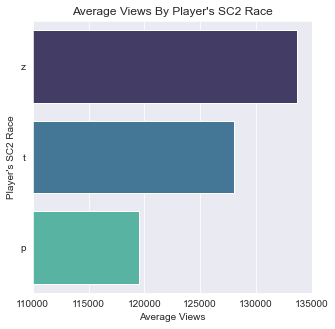

In [28]:
fig,ax = plt.subplots(figsize=(5,5))
sns.barplot(y=sc2races['race'],x=sc2races['avg_views'],palette='mako',ax=ax)
ax.set_title('Average Views By Player\'s SC2 Race')
ax.set_xlabel('Average Views')
ax.set_ylabel('Player\'s SC2 Race')
ax.set_xlim(110000,135000)
plt.show()

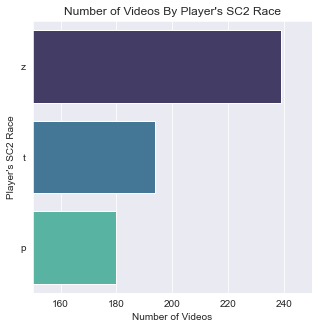

In [29]:
fig,ax = plt.subplots(figsize=(5,5))
sc2races.sort_values(by='num_videos',ascending=False,inplace=True)
sns.barplot(y=sc2races['race'],x=sc2races['num_videos'],palette='mako',ax=ax)
ax.set_title('Number of Videos By Player\'s SC2 Race')
ax.set_xlabel('Number of Videos')
ax.set_ylabel('Player\'s SC2 Race')
ax.set_xlim(150,250)
plt.show()

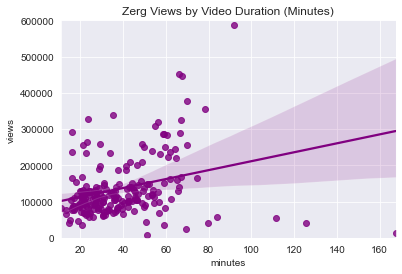

In [30]:
z = main_df[['views','minutes']].loc[main_df['z']==1]
sns.regplot(x=z['minutes'],y=z['views'], color="purple")
plt.title('Zerg Views by Video Duration (Minutes)')
plt.ylim(0,600000)
plt.show()

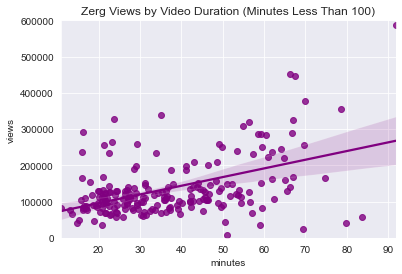

In [31]:
z2 = z.loc[z['minutes']<100]
sns.regplot(x=z2['minutes'],y=z2['views'], color="purple")
plt.title('Zerg Views by Video Duration (Minutes Less Than 100)')
plt.ylim(0,600000)
plt.show()

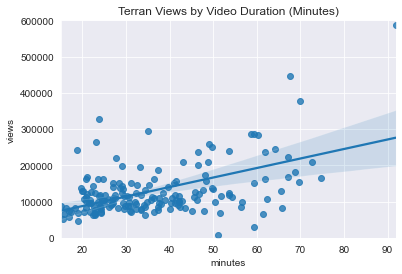

In [32]:
t = main_df[['views','minutes']].loc[main_df['t']==1]
sns.regplot(x=t['minutes'],y=t['views'])
plt.title('Terran Views by Video Duration (Minutes)')
plt.ylim(0,600000)
plt.show()

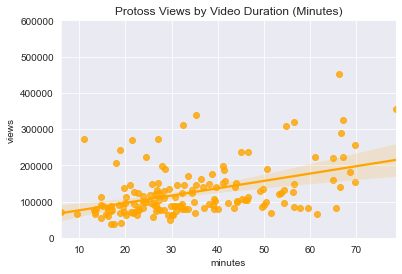

In [33]:
p = main_df[['views','minutes']].loc[main_df['p']==1]
sns.regplot(x=p['minutes'],y=p['views'], color="orange")
plt.title('Protoss Views by Video Duration (Minutes)')
plt.ylim(0,600000)
plt.show()

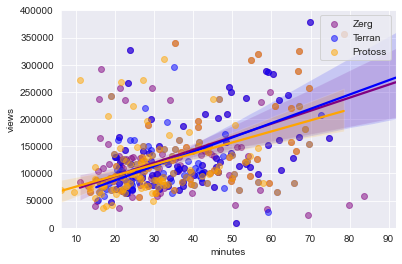

In [34]:
sns.regplot(x=z2['minutes'],y=z2['views'],scatter_kws={'alpha':0.5}, label="Zerg", color="purple")
sns.regplot(x=t['minutes'],y=t['views'],scatter_kws={'alpha':0.5}, label="Terran", color="blue")
sns.regplot(x=p['minutes'],y=p['views'],scatter_kws={'alpha':0.5}, label="Protoss", color="orange")
plt.ylim(0,400000)
plt.legend()
plt.show()

## SC2 Race Findings
- The average views by race are within 15,000 views of eachother with Zerg being the most popular, Protoss the least popular
- This makes sense as the top players in the world play with Zerg including the LowkoTV
- Protoss gameplay is usually slow and defensive
- In regards to views per video duration, the average number of views generally increase the longer the video, up to 90 minutes
- However, Zerg videos beyond 90 minutes do not get many views

# SC2 Matchups

In [35]:
matchups = matchup_df.loc[matchup_df['num_videos']>4]
matchups.sort_values(by='avg_views',ascending=False,inplace=True)

In [36]:
matchups

,matchup,avg_views,num_videos
2,ZvT,148570.689655,87
1,ZvP,141852.568966,58
0,ZvZ,119621.000000,23
4,TvP,115359.255319,47
3,TvT,93882.444444,18
5,PvP,71545.333333,18


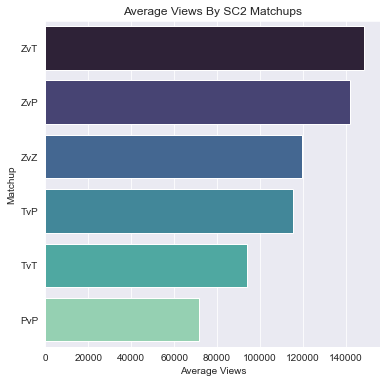

In [37]:
fig,ax = plt.subplots(figsize=(6,6))
sns.barplot(y=matchups['matchup'],x=matchups['avg_views'],palette='mako',ax=ax)
ax.set_title('Average Views By SC2 Matchups')
ax.set_xlabel('Average Views')
ax.set_ylabel('Matchup')
plt.show()

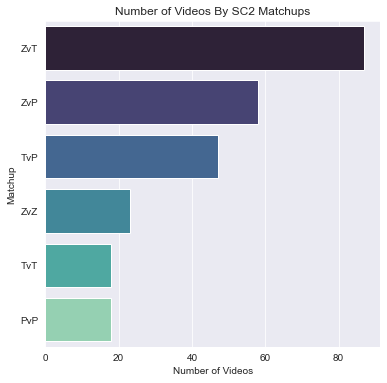

In [38]:
fig,ax = plt.subplots(figsize=(6,6))
matchups.sort_values(by='num_videos',ascending=False,inplace=True)
sns.barplot(y=matchups['matchup'],x=matchups['num_videos'],palette='mako',ax=ax)
ax.set_title('Number of Videos By SC2 Matchups')
ax.set_xlabel('Number of Videos')
ax.set_ylabel('Matchup')
plt.show()

## Matchup Findings
- Matchups with Zergs have the highest average views with mirror matchups being the lowest comparatively

# Some Key Word Visualizations

In [39]:
key_words = ['epic','EPIC','cheese','CHEESE','viewer','VIEWER','pro','PRO','rush','RUSH','most','MOST','best','BEST',
             'build','BUILD','macro','MACRO','micro','MICRO','guide','GUIDE','vs','VS','worst','WORST']

In [40]:
grammed_df.head()

,100,100 DRONES,100 DRONES maru,100 MUTALISKS,100 PLAYERS,100 PLAYERS ENTER,1000,1000 ZERGLINGS,1000 ZERGLINGS reynor,10TH,...,zest vs special,zest vs stats,zest vs zoun,zest zerg,zest zerg vs,zoun,zvp,zvp INSANE,zvp INSANE neeb,views
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8088
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57301
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43247
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,71067
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69353


In [41]:
avg_word_views = []
count_word_views = []

# Find average views and number of videos, 0 if none
for word in key_words:
    try:
        avg_word_views.append(grammed_df.loc[grammed_df[word]==1].views.mean())
        count_word_views.append(grammed_df.loc[grammed_df[word]==1].views.count())
    except:
        avg_word_views.append(0)
        count_word_views.append(0)

In [42]:
# Creating Dataframe for the words with their average views and number of videos
words_df = pd.DataFrame(data=[key_words])
words_df = words_df.T
words_df['avg_views'] = avg_word_views
words_df['num_videos'] = count_word_views
words_df.columns = ['words','avg_views','num_videos']

In [43]:
words_df

,words,avg_views,num_videos
0,epic,179480.714286,7
1,EPIC,153286.800000,20
2,cheese,179062.666667,12
3,CHEESE,111971.583333,24
4,viewer,118000.666667,18
5,VIEWER,50630.000000,2
6,pro,321651.125000,8
7,PRO,151093.400000,15
8,rush,101350.285714,14
9,RUSH,141248.100000,20


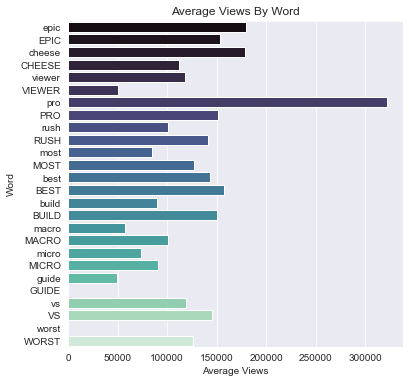

In [44]:
# Plotting an unsorted list to compare words written regularly vs all caps
fig,ax = plt.subplots(figsize=(6,6))
sns.barplot(y=words_df['words'],x=words_df['avg_views'],palette='mako',ax=ax)
ax.set_title('Average Views By Word')
ax.set_xlabel('Average Views')
ax.set_ylabel('Word')
plt.show()

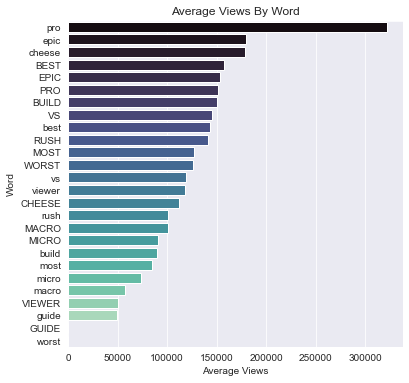

In [45]:
words_df.sort_values(by='avg_views',ascending=False,inplace=True)
fig,ax = plt.subplots(figsize=(6,6))
sns.barplot(y=words_df['words'],x=words_df['avg_views'],palette='mako',ax=ax)
ax.set_title('Average Views By Word')
ax.set_xlabel('Average Views')
ax.set_ylabel('Word')
plt.show()

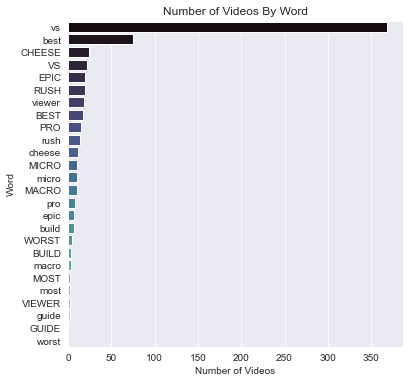

In [46]:
words_df.sort_values(by='num_videos',ascending=False,inplace=True)
fig,ax = plt.subplots(figsize=(6,6))
sns.barplot(y=words_df['words'],x=words_df['num_videos'],palette='mako',ax=ax)
ax.set_title('Number of Videos By Word')
ax.set_xlabel('Number of Videos')
ax.set_ylabel('Word')
plt.show()

## Word Findings
- Although "pro" does not appear in many videos, it results in high average views
- Certain words in all capitalized letters can have 50-100% higher average views

In [ ]:
# Dashboard drop down to select visualization, dash or plotly (makes it look much better)
#- Avg Videos by Word, Num videos by word etc
# Save image and have dashboard pull out
# Consider developing visualizations on the fly as requested